
# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

Our best value for our slope is  0.9950375007031514  with SSE 9.99800010000107e-05


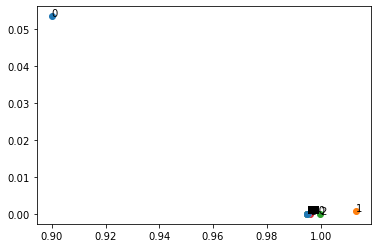

In [9]:
# First, we need to be able to approximate the derivative.
import matplotlib.pyplot as plt
import numpy as np

def SSE(x):
    err = (x**3.0)-(6.0*(x**2.0))+(11.0*x)-6.0; #Error function here is used as the polynomial function because we are minimizing the polynomial to obtain roots i.e., first and second derivative geometrical method
    SSE = np.sum(err**2);
    return SSE;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01;
    return DERIVATIVE

derivative(0.8)

n = 0;
current_x = 0.9;
rate = 0.1; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_x, SSE(current_x),'o');
plt.text(current_x, SSE(current_x),n);

while n < 100:
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    # print(new_x);
    n = n + 1;
    plt.plot(new_x, SSE(new_x),'o');
    plt.text(new_x, SSE(new_x),n);
    
print("Our best value for our slope is ", new_x, " with SSE", SSE(new_x))
# plt.xlabel("x")
# plt.ylabel("Sum of Squared Error")

# FYI - for linear models like this, the best fit for m should simply be the ratio of the mean of the two measurements
# m = np.mean(height)/np.mean(weight);
# print(m)

Our best value for our slope is  1.9949999999801018  with SSE 2.499875021460073e-05


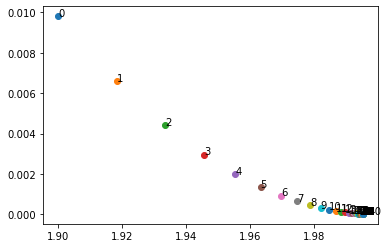

In [11]:
n1 =0
current_x1 = 1.9;

# Plot our initial guess' SSE and label zero
plt.plot(current_x1, SSE(current_x1),'o');
plt.text(current_x1, SSE(current_x1),n1);

while n1 < 100:
    new_x1 = current_x1 - rate * derivative(current_x1);
    current_x1=new_x1;
    # print(new_x);
    n1 = n1 + 1;
    plt.plot(new_x1, SSE(new_x1),'o');
    plt.text(new_x1, SSE(new_x1),n1);
    
print("Our best value for our slope is ", new_x1, " with SSE", SSE(new_x1))
# plt.xlabel("x")
# plt.ylabel("Sum of Squared Error")

# FYI - for linear models like this, the best fit for m should simply be the ratio of the mean of the two measurements
# m = np.mean(height)/np.mean(weight);
# print(m)

Our best value for our slope is  2.9949624992968484  with SSE 9.99800010000107e-05


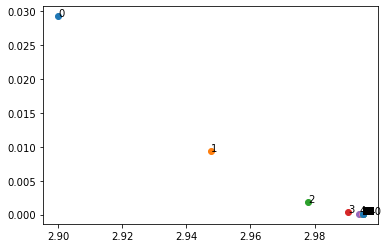

In [10]:
n2 =0
current_x2 = 2.9;

# Plot our initial guess' SSE and label zero
plt.plot(current_x2, SSE(current_x2),'o');
plt.text(current_x2, SSE(current_x2),n2);

while n2 < 100:
    new_x2 = current_x2 - rate * derivative(current_x2);
    current_x2=new_x2;
    # print(new_x);
    n2 = n2 + 1;
    plt.plot(new_x2, SSE(new_x2),'o');
    plt.text(new_x2, SSE(new_x2),n2);
    
print("Our best value for our slope is ", new_x2, " with SSE", SSE(new_x2))
# plt.xlabel("x")
# plt.ylabel("Sum of Squared Error")

# FYI - for linear models like this, the best fit for m should simply be the ratio of the mean of the two measurements
# m = np.mean(height)/np.mean(weight);
# print(m)

In [8]:
#Checking roots of the cubic equation using roots function from numpy

p = [1, -6, 11, -6]

roots = np.roots(p)

print(roots)



[3. 2. 1.]


## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [81]:
import pandas as pd
# from pandas_legislators import df
data = pd.read_csv("cars.csv") #Reading the .csv file

data #Printing the data


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [84]:
data["Group"] 

data

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0


In [107]:
# print(df['mpg'].where(df['cyl']<=6))
# df[['mpg']][(df['cyl']==4 ) & (df['cyl']==6)]

df = pd.DataFrame(data)

df1 = df.query('cyl == 8')['mpg']

column_names = ["mpg"]

df12 = pd.DataFrame(df1, columns=column_names)

df12mean = df12.mean()

print("The average of MPG for 8cyl is", df12mean)


The average of MPG for 8cyl is mpg    15.1
dtype: float64


In [108]:
df2 = df.query('cyl == 4 | cyl == 6')['mpg']

column_names = ["mpg"]

df22 = pd.DataFrame(df2, columns=column_names)

df22mean = df22.mean()

print("The average of MPG for 4 or 6 cyl is", df22mean)


The average of MPG for 4 or 6 cyl is mpg    23.972222
dtype: float64


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



In [109]:


df10 = df.query('cyl == 8')

df10["Group"] = 1

df10



C:\Users\yasodhara\AppData\Local\Temp\ipykernel_3940\1023478501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10["Group"] = 1


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Group
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,1
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,1
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,1
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,1
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,1


In [110]:
df11 = df.query('cyl ==4 | cyl == 6') 

df11

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,0
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,0


In [111]:
merged_data = df10.merge(df11, how='outer')

merged_data

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Group
0,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
1,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1
2,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,1
3,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3,1
4,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3,1
5,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,1
6,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,1
7,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,1
8,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,1
9,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,1


In [112]:
# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(32), merged_data['Group']]
print(X)

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ merged_data['mpg']
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)



[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Our intercept is  23.97222222222222 and our slope is -8.872222222222222


In [103]:
import statsmodels.api as sm
model = sm.OLS(merged_data['mpg'], sm.add_constant(merged_data['Group'])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.74
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.17e-06
Time:                        12:57:48   Log-Likelihood:                -89.584
No. Observations:                  32   AIC:                             183.2
Df Residuals:                      30   BIC:                             186.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9722      0.968     24.761      0.0

After comparing the slope, intercept and the mean values of the dataframes, it is evident that the linear regression model fits the data frame. Here, X = 'Group' (either value 0 or 1) and Y is the mpg. When we subtitue X = 0 in the equation, we get Y = 23.97 which is same as the mean value calculated before. Similarly, if you substitute X = 1 and you get Y = 15.1 which is same as the mean value for mpg of 4/6 cyl vehicles. 